# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
row=df.shape[0]
print(' the number of rows in the dataset :',row)

 the number of rows in the dataset : 294478


**c.** The number of unique users in the dataset.

In [4]:
unique_user=df['user_id'].nunique()

print('The number of unique users :',unique_user)

The number of unique users : 290584


**d.** The proportion of users converted.

In [5]:
converted_no=df['converted'].sum()
converted_proportion=converted_no/unique_user
converted_proportion
print('The proportion of users converted:',converted_proportion)

The proportion of users converted: 0.121262698566


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
x=df.query('(group=="treatment")and(landing_page!="new_page")')['user_id'].count()
print('The number of times when the group is treatment but landing_page is not a new_page :',x)

The number of times when the group is treatment but landing_page is not a new_page : 1965


In [7]:
#to calculate The number of times the new_page and treatment don't match.
y=df.query('((group=="treatment")and(landing_page!="new_page")or(group!="treatment")and(landing_page=="new_page"))')['user_id'].count()
print('The number of times the new_page and treatment do not match is ',y)

The number of times the new_page and treatment do not match is  3893


**f.** Do any of the rows have missing values?

In [8]:
print(df.isnull().sum())
print('There are no  rows have missing values')

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64
There are no  rows have missing values


Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2

inaccurate_rows=df.query('((group=="treatment")and(landing_page!="new_page")or(group!="treatment")and(landing_page=="new_page"))')['converted']
df2=df.drop(inaccurate_rows.index)

In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


 Display the rows for the duplicate **user_id**? 

In [13]:
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2=df2.drop(2893)

In [15]:
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


What is the probability of an individual converting regardless of the page they receive?

**Note**: The probability we'll compute represents the overall "converted" success rate in the population and we will call it  ppopulation .

In [16]:
population_mean=df2['converted'].mean()
print('the probability of an individual converting regardless of the page they receive is',population_mean
)

the probability of an individual converting regardless of the page they receive is 0.119597087245


Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_propability=df2.query('group=="control"')['converted'].mean()
print('p[converted|control]=',control_propability)

p[converted|control]= 0.1203863045


Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_propability=df2.query('group=="treatment"')['converted'].mean()
print('p[converted|treatment]=',treatment_propability)

p[converted|treatment]= 0.118808065515


**Note**: The probabilities we've computed in the points (b). and (c). above can also be treated as conversion rate. We will Calculate the actual difference ** (obs_diff)** between the conversion rates for the two groups. We will need that later.



In [19]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff= treatment_propability-control_propability
print('the difference between the conversion rates for the two groups is',obs_diff )

the difference between the conversion rates for the two groups is -0.00157823898536


 What is the probability that an individual received the new page?

In [20]:
p_newpage=df2.query('landing_page=="new_page"')['user_id'].count()/len(df2)
print(' the probability that an individual received the new page = ',p_newpage)

 the probability that an individual received the new page =  0.500061944223


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

According to the probabilities,"converted" probability (or rate) for the control group(old page)is slightly higher than  the treatment group users ( new page) .
**So the new treatment group users don't lead to more conversions**.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

**H0** :  pnew<=pold


**H1** : pnew> pold

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [21]:
#𝑝𝑛𝑒𝑤  = 𝑝𝑜𝑙𝑑 = 𝑝𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛
p_new=population_mean
print(' the conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis =',p_new)

 the conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis = 0.119597087245


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [22]:
#𝑝𝑛𝑒𝑤  = 𝑝𝑜𝑙𝑑 = 𝑝𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛
p_old=population_mean
print(' the conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis =',p_old)

 the conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis = 0.119597087245


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [23]:
n_new=df2[df2['group']=='treatment']['landing_page'].count()
print(' the number of individuals in the treatment group   𝑛_𝑛𝑒𝑤 = ',n_new)

 the number of individuals in the treatment group   𝑛_𝑛𝑒𝑤 =  145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old=df2[df2['group']=='control']['landing_page'].count()
print(' the number of individuals in the treatment group   𝑛_old = ',n_old)

 the number of individuals in the treatment group   𝑛_old =  145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [25]:
# Simulate a Sample for the treatment Group
new_page_converted=np.random.choice([1,0],size=n_new,p=[p_new,1-p_new])
new_mean=new_page_converted.mean()
new_mean

0.11896634780813434

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [26]:
# Simulate a Sample for the control Group
old_page_converted=np.random.choice([1,0],size=n_old,p=[p_old,1-p_old])
old_mean=old_page_converted.mean()
old_mean

0.11898206148381679

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [27]:
converted_diffs=new_mean-old_mean
print('the difference in the "converted" probability  (𝑝′𝑛𝑒𝑤-𝑝′𝑜𝑙𝑑) =',converted_diffs)

the difference in the "converted" probability  (𝑝′𝑛𝑒𝑤-𝑝′𝑜𝑙𝑑) = -1.57136756825e-05



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [28]:
# Sampling distribution 
p_diffs = []
p_new_page_converted=np.random.binomial(n_new,p_new,10000)/n_new
P_old_page_converted=np.random.binomial(n_old,p_old,10000)/n_old
diff_mean=p_new_page_converted-P_old_page_converted
p_diffs.append(diff_mean)


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

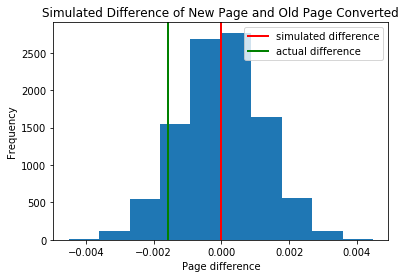

In [29]:
plt.hist(p_diffs)
plt.title('Simulated Difference of New Page and Old Page Converted')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r',linewidth=2, label="simulated difference")
plt.axvline(x=obs_diff, color='g', linewidth=2, label="actual difference")
plt.legend()


the histogram showed normal distribution for the simulated data as expected and the mean is 0 due to our null hypothesis assumption.



**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
# Find proportion of p_diffs greater than the actual difference
p_greater_than_diff=(p_diffs>obs_diff).mean()
# Calculate values
print("Actual difference:" , obs_diff)

print('P_value=', p_greater_than_diff)


Actual difference: -0.00157823898536
P_value= 0.9037


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

*this value we just computed is the p-value=0.904

*since p-value=0.904 is large than 0.05(Type I error rate) , we fail to reject the null value there for the new page doesn't have a better conversion rate than the old page



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = (df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])['converted'].sum()

# number of conversions with the new_page
convert_new =(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2[df2['landing_page']=='old_page']['user_id'].count()

# number of individuals who received new_page
n_new = df2[df2['landing_page']=='new_page']['user_id'].count()
print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [32]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old],nobs=[n_new, n_old],alternative='larger')
print('z_score =',z_score,
      '\np_value =',p_value)

z_score = -1.31092419842 
p_value = 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


Since we are in right-tailed test, 𝑍𝑠𝑐𝑜𝑟𝑒(-1.3109 )  <  𝑍𝛼(1.645) and
p_value(0.905) < .05(Type I error rate) , so we fail to reject the null hupothesis H0 which is agree to the findings in parts j and k.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**we'll use logistic regression as each row in the df2 data is either a conversion or no conversion**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [34]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-05-14 11:46 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


**the p-value is 0.19 which is larger than 0.05 so we fail to reject the null hypotheses and  it differ from the value we found in Part II as in this regression model we are preforming a two -tailed test while in part II we preformed a right_tailed test**



**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Sure it's a good idea to correlate our prediction with more factors that may impact the decision to get better accuracy.
Disadvantages of adding additional terms that they may have low impact and low correlation. so we need to avoid multicolinearty.**.



**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Note** We use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [36]:
# Read the countries.csv
countries=pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
# Join with the df2 dataframe
df_merged = df2.set_index('user_id').join(countries.set_index('user_id'))
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [38]:
# Create the necessary dummy variables
df_merged[['UK', 'US', 'CA']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,CA
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [39]:
lm2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US']])
results2 = lm2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-05-14 11:46 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
US            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

From p values country does not has a high significant impact on conversion.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [40]:
## Create the necessary additional columns.
df_merged["UK_page"] = df_merged["ab_page"] * df_merged["UK"]
df_merged["US_page"] = df_merged["ab_page"] * df_merged["US"]
df_merged.head()


,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,CA,UK_page,US_page
user_id,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [41]:
# Fit your model, and summarize the results
lm3=sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page', 'UK','US','UK_page','US_page']])
results3=lm3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-05-14 11:46 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
US           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
UK_page      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
US_page       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

All p values are greater than 0.05 so we don't have significant impact on conversion.




Finally, statistically we don't have evidance to reject the null hypothesis using p values, zscore and logistic model. Which mean that the old page is better than the new page and the conversion rates bewtween both of them almost the same. Also type of page and countries don't have significant impact on the coversion rate.
Our recommendation is to try to improve the new page quality to get better result and increase the conversion rate  so **we can keep the old page untill enhancing the new page**.




<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0